In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import IsolationForest
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix, classification_report, precision_recall_fscore_support, roc_auc_score ,precision_recall_curve
from sklearn.neighbors import NearestNeighbors

# Step 1: Understand the Dataset

In [4]:
df=pd.read_csv('creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [6]:
df.shape

(284807, 31)

In [7]:
print("=== Info ===")
display(df.info())

print("\n=== Describe ===")
display(df.describe().transpose())

=== Info ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 2

None


=== Describe ===


,count,mean,std,min,25%,50%,75%,max
Time,284807.0,9.481386e+04,47488.145955,0.000000,54201.500000,84692.000000,139320.500000,172792.000000
V1,284807.0,1.168375e-15,1.958696,-56.407510,-0.920373,0.018109,1.315642,2.454930
V2,284807.0,3.416908e-16,1.651309,-72.715728,-0.598550,0.065486,0.803724,22.057729
V3,284807.0,-1.379537e-15,1.516255,-48.325589,-0.890365,0.179846,1.027196,9.382558
V4,284807.0,2.074095e-15,1.415869,-5.683171,-0.848640,-0.019847,0.743341,16.875344
V5,284807.0,9.604066e-16,1.380247,-113.743307,-0.691597,-0.054336,0.611926,34.801666
V6,284807.0,1.487313e-15,1.332271,-26.160506,-0.768296,-0.274187,0.398565,73.301626
V7,284807.0,-5.556467e-16,1.237094,-43.557242,-0.554076,0.040103,0.570436,120.589494
V8,284807.0,1.213481e-16,1.194353,-73.216718,-0.208630,0.022358,0.327346,20.007208
V9,284807.0,-2.406331e-15,1.098632,-13.434066,-0.643098,-0.051429,0.597139,15.594995


In [8]:
print("\n=== TARGET DISTRIBUTION ===")
print(df['Class'].value_counts())
print(df['Class'].value_counts(normalize=True))

print("\n=== NULLs ===")
print(df.isnull().sum().sort_values(ascending=False).head(10))

print("\n=== DUPLICATES ===")
print("Duplicate rows:", df.duplicated().sum())

print("\n=== AMOUNT DESCRIPTIVE ===")
print(df['Amount'].describe())


=== TARGET DISTRIBUTION ===
Class
0    284315
1       492
Name: count, dtype: int64
Class
0    0.998273
1    0.001727
Name: proportion, dtype: float64

=== NULLs ===
Time    0
V1      0
V2      0
V3      0
V4      0
V5      0
V6      0
V7      0
V8      0
V9      0
dtype: int64

=== DUPLICATES ===
Duplicate rows: 1081

=== AMOUNT DESCRIPTIVE ===
count    284807.000000
mean         88.349619
std         250.120109
min           0.000000
25%           5.600000
50%          22.000000
75%          77.165000
max       25691.160000
Name: Amount, dtype: float64


# Step 2: Clean the Data

In [9]:
df = df.drop_duplicates().reset_index(drop=True)
print("After drop_duplicates, shape:", df.shape)

After drop_duplicates, shape: (283726, 31)


In [10]:
# Quick stats on PCA features (V1–V28), Amount, Time
V_cols = [f"V{i}" for i in range(1,29)]

print("\nMeans of V columns (should be ~0):")
print(df[V_cols].mean().head())

print("\nStd of V columns (should be ~1):")
print(df[V_cols].std().head())

print("\nAmount description:")
print(df['Amount'].describe())

print("\nTime description:")
print(df['Time'].describe())



Means of V columns (should be ~0):
V1    0.005917
V2   -0.004135
V3    0.001613
V4   -0.002966
V5    0.001828
dtype: float64

Std of V columns (should be ~1):
V1    1.948026
V2    1.646703
V3    1.508682
V4    1.414184
V5    1.377008
dtype: float64

Amount description:
count    283726.000000
mean         88.472687
std         250.399437
min           0.000000
25%           5.600000
50%          22.000000
75%          77.510000
max       25691.160000
Name: Amount, dtype: float64

Time description:
count    283726.000000
mean      94811.077600
std       47481.047891
min           0.000000
25%       54204.750000
50%       84692.500000
75%      139298.000000
max      172792.000000
Name: Time, dtype: float64


# Step 3: Exploratory Data Analysis

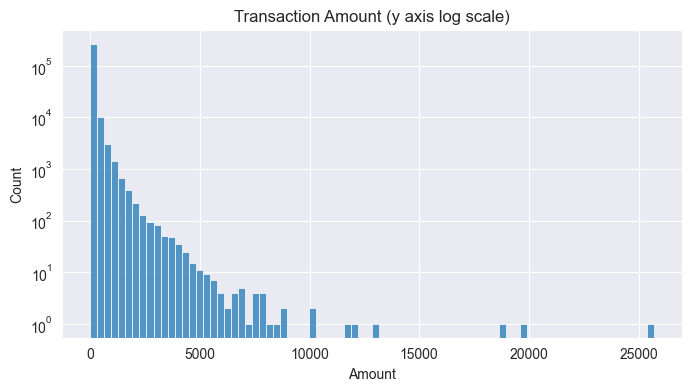

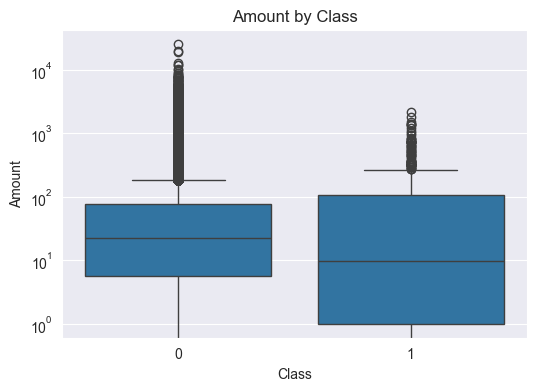

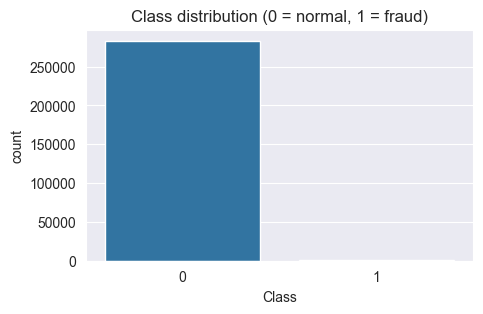

In [15]:
# Exploratory Data Analysis (EDA) plots

sns.set_style("darkgrid")

# Distribution of transaction Amount
plt.figure(figsize=(8,4))
sns.histplot(df['Amount'], bins=80)
plt.yscale('log')
plt.title("Transaction Amount (y axis log scale)")
plt.show()

# Boxplot of Amount by Class (fraud vs non-fraud)
plt.figure(figsize=(6,4))
sns.boxplot(x='Class', y='Amount', data=df)
plt.yscale("log")
plt.title("Amount by Class")
plt.show()

# Class imbalance visualization
plt.figure(figsize=(5,3))
sns.countplot(x='Class', data=df)
plt.title("Class distribution (0 = normal, 1 = fraud)")
plt.show()


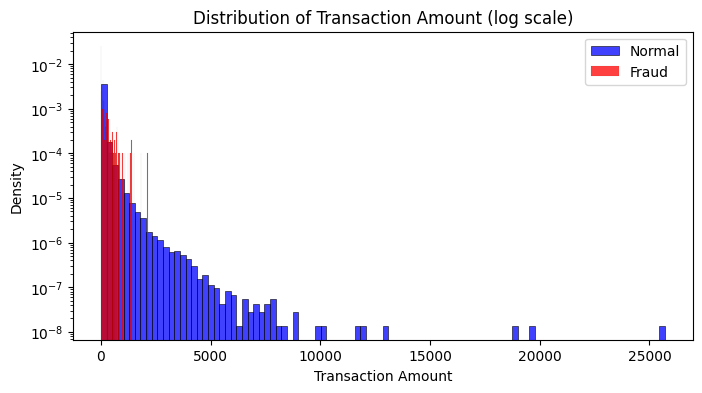

In [11]:
#transaction amount distribution by class
plt.figure(figsize=(8,4))
sns.histplot(df[df["Class"]==0]["Amount"], bins=100, color="blue", label="Normal", stat="density")
sns.histplot(df[df["Class"]==1]["Amount"], bins=100, color="red", label="Fraud", stat="density")
plt.yscale("log")
plt.xlabel("Transaction Amount")
plt.title("Distribution of Transaction Amount (log scale)")
plt.legend()
plt.show()

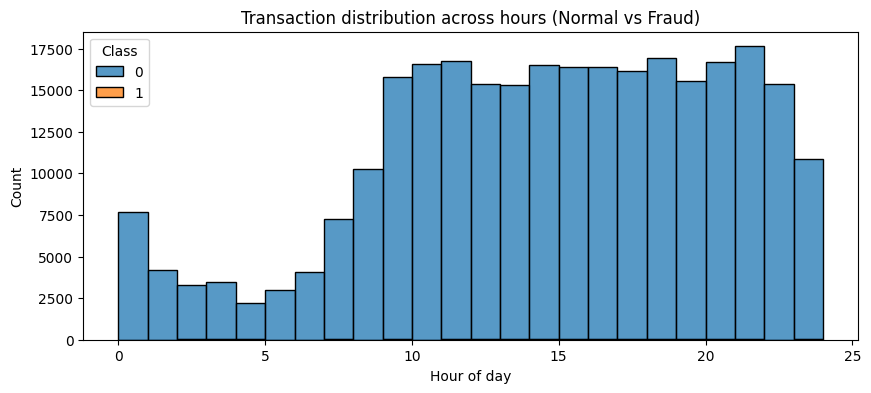

In [12]:
#transaction time patterns (time of day)



df["Hour"] = (df["Time"] / 3600) % 24  # wrap into 24h cycle

plt.figure(figsize=(10,4))
sns.histplot(data=df, x="Hour", bins=24, hue="Class", multiple="stack")
plt.title("Transaction distribution across hours (Normal vs Fraud)")
plt.xlabel("Hour of day")
plt.ylabel("Count")
plt.show()


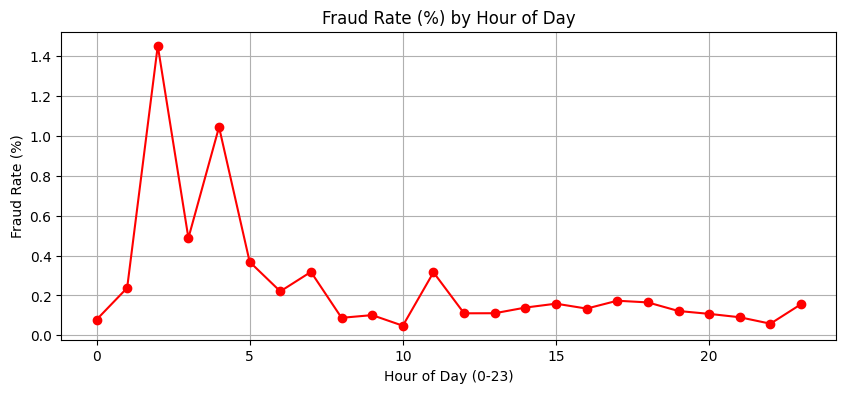

In [15]:
#fraud rate by hour
df["Hour"] = (df["Time"] / 3600).astype(int) % 24  

# Count fraud rate per hour
fraud_by_hour = df.groupby("Hour")["Class"].mean() * 100
count_by_hour = df.groupby("Hour")["Class"].count()

# Plot fraud rate by hour
import matplotlib.pyplot as plt

plt.figure(figsize=(10,4))
fraud_by_hour.plot(kind="line", marker="o", color="red")
plt.title("Fraud Rate (%) by Hour of Day")
plt.xlabel("Hour of Day (0-23)")
plt.ylabel("Fraud Rate (%)")
plt.grid(True)
plt.show()



In [16]:
n_total = len(df)
n_fraud = int(df['Class'].sum())
print(f"Total rows: {n_total}, Fraud cases: {n_fraud}, Fraud rate: {n_fraud / n_total:.5f} ({n_fraud / n_total*100:.3f}%)")

Total rows: 283726, Fraud cases: 473, Fraud rate: 0.00167 (0.167%)


In [31]:
#  Feature preparation (scale Amount + Time for modeling)
from sklearn.preprocessing import StandardScaler, RobustScaler

# RobustScaler handles outliers better for Amount
df['Amount_scaled'] = RobustScaler().fit_transform(df[['Amount']])
df['Time_scaled']   = StandardScaler().fit_transform(df[['Time']])

# Final feature set = V1–V28 + scaled Amount + scaled Time
feature_cols = V_cols + ['Amount_scaled', 'Time_scaled']
X = df[feature_cols].values
y = df['Class'].values  # target labels

print("Feature matrix shape:", X.shape)


Feature matrix shape: (283726, 30)


# Step 4: Applying Anomaly Detection Models


### Baseline Isolation Forest 

In [32]:
fraud_rate = np.mean(y)
iso = IsolationForest(n_estimators=300, contamination=fraud_rate, random_state=42, n_jobs=-1)
iso.fit(X)

scores = iso.decision_function(X)
y_pred = (iso.predict(X) == -1).astype(int)

print('Confusion matrix:\n', confusion_matrix(y, y_pred))
print(classification_report(y, y_pred, digits=4))
print('ROC AUC:', roc_auc_score(y, -scores))


Confusion matrix:
 [[282893    360]
 [   360    113]]
              precision    recall  f1-score   support

           0     0.9987    0.9987    0.9987    283253
           1     0.2389    0.2389    0.2389       473

    accuracy                         0.9975    283726
   macro avg     0.6188    0.6188    0.6188    283726
weighted avg     0.9975    0.9975    0.9975    283726

ROC AUC: 0.9470250372467874


### Tuning Contamination

In [34]:
results = []
for c in [fraud_rate, 0.003, 0.005, 0.01]:
    model = IsolationForest(n_estimators=300, contamination=c, random_state=42, n_jobs=-1)
    model.fit(X)
    sc = model.decision_function(X)
    yp = (model.predict(X) == -1).astype(int)
    cm = confusion_matrix(y, yp)
    prec, rec, f1, _ = precision_recall_fscore_support(y, yp, average='binary')
    results.append(dict(contamination=c, precision=prec, recall=rec, f1=f1, roc_auc=roc_auc_score(y, -sc)))

pd.DataFrame(results)

,contamination,precision,recall,f1,roc_auc
0,0.001667,0.238901,0.238901,0.238901,0.947025
1,0.003000,0.179577,0.323467,0.230943,0.947025
2,0.005000,0.139535,0.418605,0.209302,0.947025
3,0.010000,0.095842,0.575053,0.164301,0.947025


###  Precision–Recall Threshold Tuning
Use anomaly scores directly and choose thresholds for recall ≈ 0.4, 0.5, 0.6.

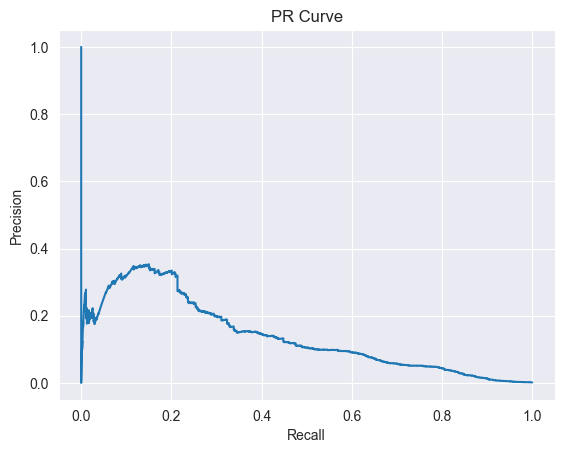


Target recall≈ 0.4
Precision: 0.14460596786534047 Recall: 0.39957716701902746
[[282135   1118]
 [   284    189]]
              precision    recall  f1-score   support

           0     0.9990    0.9961    0.9975    283253
           1     0.1446    0.3996    0.2124       473

    accuracy                         0.9951    283726
   macro avg     0.5718    0.6978    0.6049    283726
weighted avg     0.9976    0.9951    0.9962    283726


Target recall≈ 0.5
Precision: 0.10440528634361233 Recall: 0.5010570824524313
[[281220   2033]
 [   236    237]]
              precision    recall  f1-score   support

           0     0.9992    0.9928    0.9960    283253
           1     0.1044    0.5011    0.1728       473

    accuracy                         0.9920    283726
   macro avg     0.5518    0.7469    0.5844    283726
weighted avg     0.9977    0.9920    0.9946    283726


Target recall≈ 0.6
Precision: 0.09021601016518424 Recall: 0.6004228329809725
[[280389   2864]
 [   189    284]]
      

In [37]:
prec, rec, thr = precision_recall_curve(y, -scores)
plt.plot(rec, prec)
plt.xlabel('Recall'); plt.ylabel('Precision'); plt.title('PR Curve'); plt.show()

for target in [0.4, 0.5, 0.6]:
    idx = (np.abs(rec - target)).argmin()
    th = thr[idx]
    yp_thr = ((-scores) >= th).astype(int)
    print('\nTarget recall≈', target)
    print('Precision:', prec[idx], 'Recall:', rec[idx])
    print(confusion_matrix(y, yp_thr))
    print(classification_report(y, yp_thr, digits=4))


###  Visualization with PCA
Project to 2D with PCA and show anomalies vs majority.

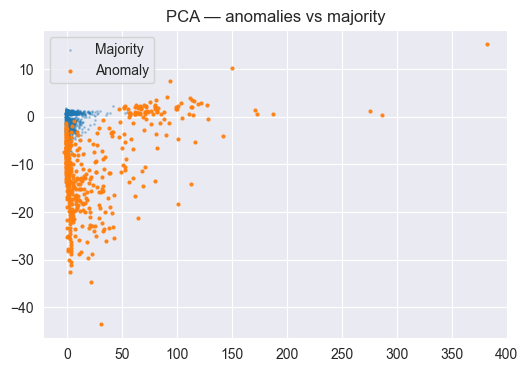

In [38]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2, random_state=42)
X2 = pca.fit_transform(X)

anom_idx = np.where(y_pred==1)[0]

plt.figure(figsize=(6,4))
plt.scatter(X2[:10000,0], X2[:10000,1], s=1, alpha=0.3, label='Majority')
plt.scatter(X2[anom_idx,0], X2[anom_idx,1], s=4, alpha=0.9, label='Anomaly')
plt.legend(); plt.title('PCA — anomalies vs majority'); plt.show()

We applied Isolation Forest to the credit card dataset for fraud detection.

- **Baseline model** (contamination ≈ fraud rate):  
  Precision ≈ 0.24, Recall ≈ 0.24, ROC AUC ≈ 0.947.  
  This caught only ~24% of frauds.

- **Tuning contamination**:  
  At contamination=0.01, recall improved to ~57% but precision dropped to ~10%.  
  This shows the trade-off: higher recall → more frauds caught, but more false positives.

- **Threshold tuning (PR curve)**:  
  By selecting thresholds directly:  
  - Recall ≈ 0.40 → Precision ≈ 0.18  
  - Recall ≈ 0.50 → Precision ≈ 0.13  
  - Recall ≈ 0.60 → Precision ≈ 0.10  

- **Visualization with PCA** confirmed that anomalies lie outside the dense cluster of normal transactions.

### Key insight:
In fraud detection, recall is usually prioritized, even if precision is low, because missing frauds is more costly than investigating extra flagged cases.
